In [122]:
import numpy as np
from PIL import Image

In [123]:
image_path = "images/example.bmp"
image = Image.open(image_path)

In [124]:
def svd_compression(image_array,N):
    U, S, Vt = np.linalg.svd(image_array, full_matrices=False)
    compressed_U = U[:,:N]
    compressed_S = np.diag(S[:N])
    compressed_Vt = Vt[:N,:]

    return compressed_U, compressed_S, compressed_Vt

In [125]:
width, height = image.size

In [126]:
red, green, blue = zip(*image.getdata())

In [127]:
red_m = [red[i*width:i*width + width] for i in range(height)]
green_m = [green[i*width:i*width + width] for i in range(height)]
blue_m = [blue[i*width:i*width + width] for i in range(height)]

In [128]:
def new_matrix(red, green, blue):
    r_f = np.array(red).flatten()
    g_f = np.array(green).flatten()
    b_f = np.array(blue).flatten()

    new_pixels = list(zip(np.rint(r_f).astype(int),np.rint(g_f).astype(int), np.rint(b_f).astype(int)))
    
    image = Image.new("RGB", (width, height))
    image.putdata(new_pixels)

    image.save("images/compressed.bmp")

    return image

In [129]:
def mult(A,B,C):
    return np.dot(A,np.dot(B,C))

In [130]:
N = 5

r = mult(*svd_compression(red_m, N))
g = mult(*svd_compression(green_m, N))
b = mult(*svd_compression(blue_m, N))


print(len(red_m))



426


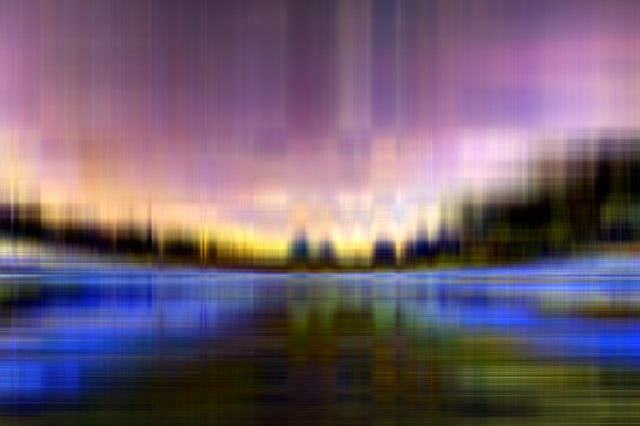

In [131]:
new_matrix(r,g,b)